<a href="https://colab.research.google.com/github/Mular56/Machine_learning/blob/main/%D0%9C%D1%83%D0%BB%D1%8F%D1%80_%D0%BF%D1%80_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


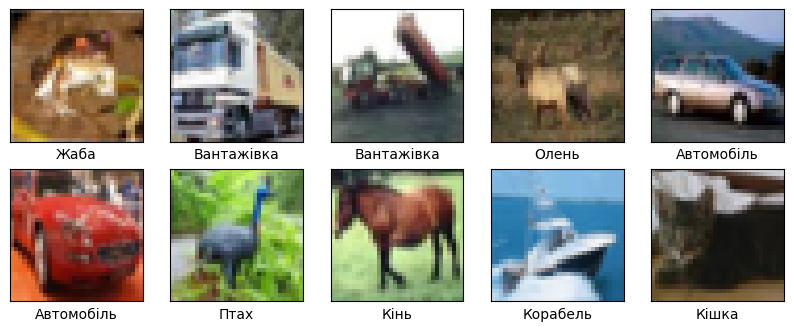

In [1]:
'''Завдання 1.
Створити нейронну мережу (модель) з використанням згорткових шарів для датасета
cifar 10 (mnist, fasion mnist).
для цього завантажити датасет, вивести перші 10 зображень.'''

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Завантаження даних CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Нормалізація даних
train_images, test_images = train_images / 255.0, test_images / 255.0

# Виведення перших 10 зображень
class_names = ['Літак', 'Автомобіль', 'Птах', 'Кішка', 'Олень', 'Собака', 'Жаба', 'Кінь', 'Корабель', 'Вантажівка']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [3]:
'''Підготувати дані
Підібрати архітектуру моделі (кількість шарів, оптимізатор, розмір батча, кількість епох)
При навчанні використовувати кол-бекі (рання зупинка та (або) зменшення швидкості навчання)
вивести summary'''
# Модель зі згортковими шарами
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Показати структуру моделі
model.summary()

# Компіляція моделі
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Колбеки
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2)

# Навчання моделі
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, lr_reduction])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3555 - loss: 1.7429 - val_accuracy: 0.5616 - val_loss: 1.2289 - learning_rate: 0.0010
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.5848 - loss: 1.1720 - val_accuracy: 0.6303 - val_loss: 1.0317 - learning_rate: 0.0010
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6450 - loss: 1.0031 - val_accuracy: 0.6350 - val_loss: 1.0271 - learning_rate: 0.0010
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6879 - loss: 0.8903 - val_accuracy: 0.6809 - val_loss: 0.9111 - learning_rate: 0.0010
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7147 - loss: 0.8111 - val_accuracy: 0.6851 - val_loss: 0.9095 - learning_rate: 0.0010
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7383 - loss: 0.7444 - val_accuracy: 0.6875 - val_loss: 0.8890 - learning_rate: 0.0010
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7554 

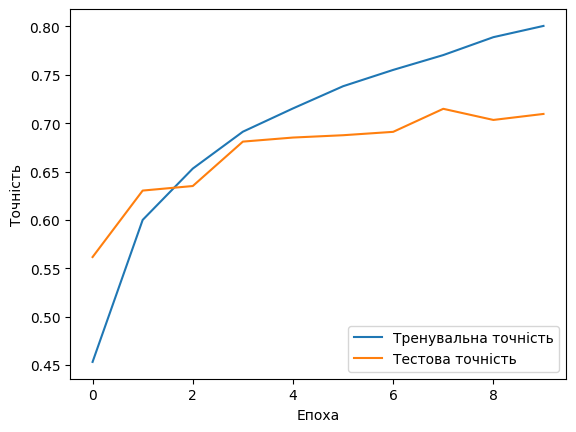

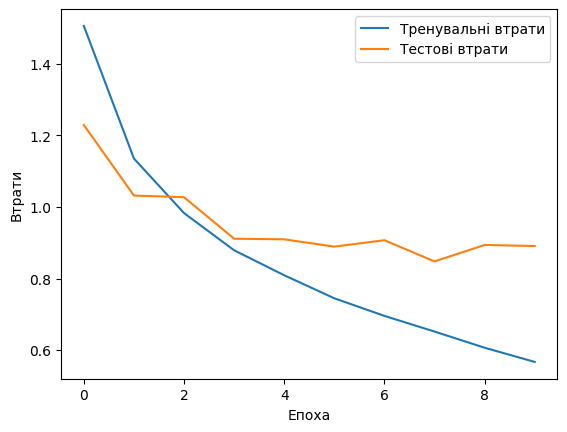

In [4]:
'''побудувати графіки функції втрат і точності'''
# Графік точності
plt.plot(history.history['accuracy'], label='Тренувальна точність')
plt.plot(history.history['val_accuracy'], label='Тестова точність')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend(loc='lower right')
plt.show()

# Графік функції втрат
plt.plot(history.history['loss'], label='Тренувальні втрати')
plt.plot(history.history['val_loss'], label='Тестові втрати')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend(loc='upper right')
plt.show()


In [5]:
'''класифікаційний звіт'''
# Оцінка моделі
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Передбачення
predictions = model.predict(test_images)

# Звіт про класифікацію
y_pred = predictions.argmax(axis=1)
print(classification_report(test_labels, y_pred, target_names=class_names))


313/313 - 0s - 2ms/step - accuracy: 0.7095 - loss: 0.8908
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

       Літак       0.76      0.72      0.74      1000
  Автомобіль       0.90      0.75      0.82      1000
        Птах       0.61      0.63      0.62      1000
       Кішка       0.53      0.52      0.52      1000
       Олень       0.61      0.73      0.66      1000
      Собака       0.66      0.55      0.60      1000
        Жаба       0.73      0.82      0.77      1000
        Кінь       0.82      0.72      0.77      1000
    Корабель       0.83      0.78      0.80      1000
  Вантажівка       0.71      0.88      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



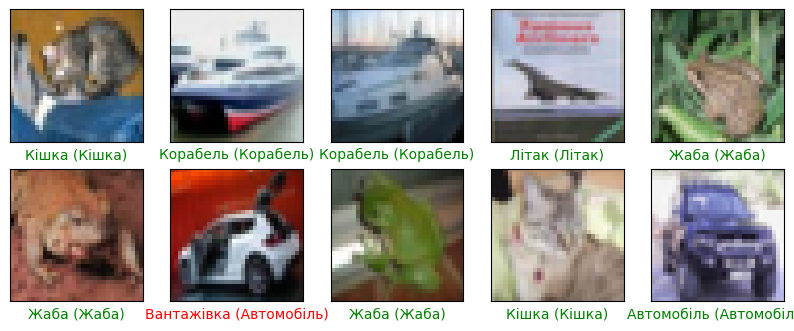

In [6]:
'''візуалізацію розпізнавання.'''
# Візуалізація передбачень
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    predicted_label = class_names[y_pred[i]]
    true_label = class_names[test_labels[i][0]]
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f'{predicted_label} ({true_label})', color=color)
plt.show()


In [7]:
'''Завдання 2: Використання попередньо навченої моделі VGG16
1. Імпорт та підготовка VGG16'''
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Dense

# Завантаження моделі VGG16 з предтренованими вагами
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Замороження базових шарів
for layer in vgg_base.layers:
    layer.trainable = False

# Додавання нових шарів
x = Flatten()(vgg_base.output)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

# Нова модель
vgg_model = Model(vgg_base.input, x)

# Компіляція моделі
vgg_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Показати структуру моделі
vgg_model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,982,474 (57.15 MB)

 Trainable params: 267,786 (1.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
'''2. Навчання та колбеки'''
# Колбеки
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2)

# Навчання
history_vgg = vgg_model.fit(train_images, train_labels, epochs=10,
                            validation_data=(test_images, test_labels),
                            callbacks=[early_stopping, lr_reduction])


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.4869 - loss: 1.4686 - val_accuracy: 0.5692 - val_loss: 1.2250 - learning_rate: 0.0010
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5890 - loss: 1.1646 - val_accuracy: 0.5940 - val_loss: 1.1632 - learning_rate: 0.0010
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6195 - loss: 1.0845 - val_accuracy: 0.5943 - val_loss: 1.1615 - learning_rate: 0.0010
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6417 - loss: 1.0152 - val_accuracy: 0.5977 - val_loss: 1.1404 - learning_rate: 0.0010
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.6598 - loss: 0.9621 - val_accuracy: 0.6118 - val_loss: 1.1069 - learning_rate: 0.0010
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6744 - loss: 0.9214 - val_accuracy: 0.6211 - val_loss: 1.1054 - learning_rate: 0.0010
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0

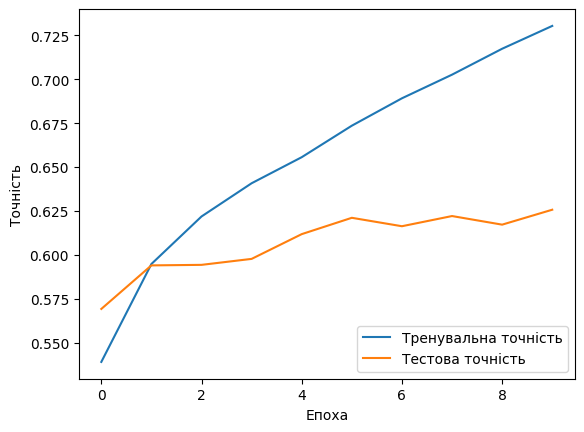

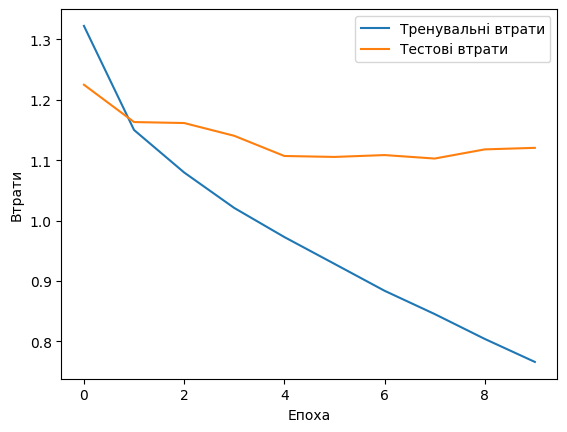

In [9]:
'''3. Графіки функції втрат і точності для моделі VGG16'''
# Графік точності
plt.plot(history_vgg.history['accuracy'], label='Тренувальна точність')
plt.plot(history_vgg.history['val_accuracy'], label='Тестова точність')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend(loc='lower right')
plt.show()

# Графік функції втрат
plt.plot(history_vgg.history['loss'], label='Тренувальні втрати')
plt.plot(history_vgg.history['val_loss'], label='Тестові втрати')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend(loc='upper right')
plt.show()


In [10]:
'''4. Класифікаційний звіт'''
# Оцінка моделі
test_loss_vgg, test_acc_vgg = vgg_model.evaluate(test_images, test_labels, verbose=2)

# Передбачення
predictions_vgg = vgg_model.predict(test_images)

# Звіт про класифікацію
y_pred_vgg = predictions_vgg.argmax(axis=1)
print(classification_report(test_labels, y_pred_vgg, target_names=class_names))


313/313 - 3s - 8ms/step - accuracy: 0.6257 - loss: 1.1204
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
              precision    recall  f1-score   support

       Літак       0.72      0.68      0.70      1000
  Автомобіль       0.67      0.74      0.70      1000
        Птах       0.66      0.45      0.53      1000
       Кішка       0.48      0.41      0.44      1000
       Олень       0.51      0.66      0.58      1000
      Собака       0.55      0.54      0.54      1000
        Жаба       0.63      0.71      0.67      1000
        Кінь       0.73      0.63      0.68      1000
    Корабель       0.70      0.78      0.73      1000
  Вантажівка       0.64      0.66      0.65      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.62     10000
weighted avg       0.63      0.63      0.62     10000



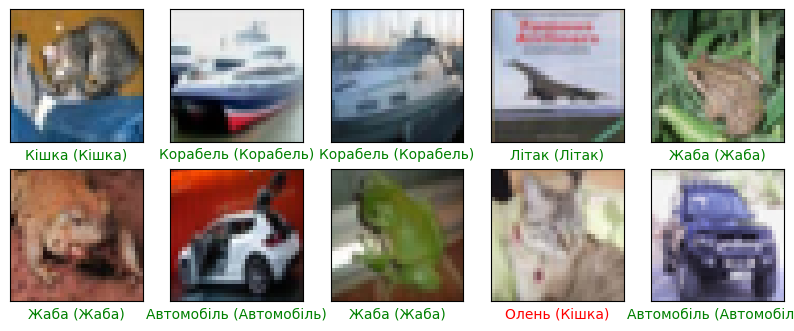

In [12]:
'''5. Візуалізація розпізнавання'''
# Візуалізація передбачень VGG16
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    predicted_label = class_names[y_pred_vgg[i]]
    true_label = class_names[test_labels[i][0]]
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f'{predicted_label} ({true_label})', color=color)
plt.show()


Під час виконання цієї лабораторної роботи було продемонстровано ефективність як простих згорткових мереж, так і більш складних попередньо навчених моделей для вирішення задач класифікації зображень. Техніка тонкого налаштування попередньо навченої моделі дозволила покращити результативність і швидкість навчання, показавши важливість використання сучасних інструментів і методів машинного навчання.